In [1]:
import numpy as np
import pandas as pd

In [42]:
df=pd.read_csv('mnist_train.csv')

In [6]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [8]:
df.shape

(42000, 785)

In [10]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
28878      7       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
28878       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
28878         0         0         0         0         0  

[1 rows x 785 columns]

In [11]:
import matplotlib.pyplot as plt

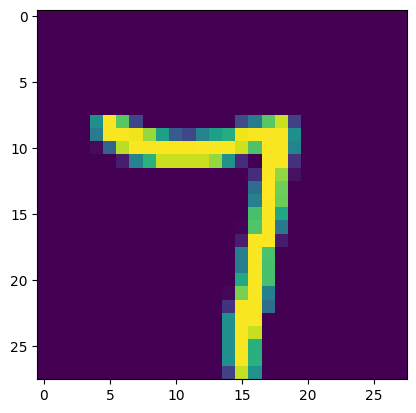

In [16]:
plt.imshow(df.iloc[28878,1:].values.reshape(28,28))

In [43]:
X=df.iloc[:,1:]

In [44]:
Y=df.iloc[:,0]

In [20]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [23]:
X_train.shape

(33600, 784)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn=KNeighborsClassifier()

In [26]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [28]:
import time
start=time.time()
Y_pred=knn.predict(X_test)
print(time.time()-start)

14.846357107162476


# By using PCA 

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,Y_test)

0.9648809523809524

## Mean centering

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [46]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [38]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)

In [47]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [49]:
X_train_trf.shape

(33600, 100)

In [41]:
knn=KNeighborsClassifier()


In [51]:
knn.fit(X_train_trf,Y_train)

KNeighborsClassifier()

In [52]:
Y_pred=knn.predict(X_test_trf)

In [53]:
accuracy_score(Y_pred,Y_test)

0.9544047619047619

In [54]:
for i in range(1,785):
    pca=PCA(n_components=i)
    X_train_trf=pca.fit_transform(X_train)
    X_test_trf=pca.transform(X_test)
    knn=KNeighborsClassifier()
    knn.fit(X_train_trf,Y_train)
    Y_pred=knn.predict(X_test_trf)
    print(accuracy_score(Y_pred,Y_test))

0.2580952380952381
0.3236904761904762
0.5104761904761905
0.6663095238095238
0.7378571428571429
0.8227380952380953
0.8436904761904762
0.8721428571428571
0.886547619047619
0.9055952380952381
0.9116666666666666
0.9184523809523809
0.9276190476190476
0.9351190476190476
0.9384523809523809
0.9379761904761905
0.9407142857142857
0.94
0.9425
0.9442857142857143
0.9438095238095238
0.9441666666666667
0.9442857142857143
0.9457142857142857
0.9484523809523809
0.9479761904761905
0.9478571428571428
0.9471428571428572
0.949047619047619
0.9491666666666667
0.9507142857142857
0.9513095238095238
0.95
0.9504761904761905
0.950952380952381
0.9519047619047619
0.9517857142857142
0.9527380952380953
0.9533333333333334
0.9528571428571428
0.9522619047619048
0.9522619047619048
0.9523809523809523
0.9533333333333334
0.9528571428571428
0.9530952380952381
0.9530952380952381
0.9533333333333334
0.9527380952380953
0.9533333333333334
0.9545238095238096
0.954047619047619
0.9541666666666667
0.9541666666666667
0.9546428571428571

KeyboardInterrupt: 

In [56]:
pca=PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [57]:
X_train_trf

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]])

In [60]:
import plotly.io as pio
pio.renderers.default = "notebook" 

In [61]:
import plotly.express as px
Y_train_trf=Y_train.astype(str)
fig=px.scatter(x=X_train_trf[:,0],
              y=X_train_trf[:,1],
               color=Y_train_trf,
               color_discrete_sequence=px.colors.qualitative.G10
              )
fig.show()

In [63]:
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [64]:
X_train_trf

array([[-2.71863253, -0.48982409,  1.1354966 ],
       [-0.67698015, -6.75362491, -2.33590139],
       [-3.03323281,  6.50981624,  7.49182983],
       ...,
       [ 2.14883643,  0.78079444, -0.74738774],
       [ 1.05957006,  0.94767312,  3.94973114],
       [17.70258446,  1.96188185, -4.94352837]])

In [67]:
import plotly.express as px

fig = px.scatter_3d(
    x=X_train_trf[:, 0],
    y=X_train_trf[:, 1],
    z=X_train_trf[:, 2],
    color=Y_train.astype(str)
)

fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()


In [69]:
pca.explained_variance_
#Eigen values

array([40.67111198, 29.17023401, 26.74459621])

In [77]:
pca.components_
#eigen vectors

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [75]:
pca.components_.shape

(3, 784)

In [78]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [79]:
pca=PCA(n_components=None)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)